For this demonstration, we use the Ames House Prices dataset produced by Professor Dean De Cock:

Dean De Cock (2011) Ames, Iowa: Alternative to the Boston Housing
Data as an End of Semester Regression Project, Journal of Statistics Education, Vol.19, No. 3

http://jse.amstat.org/v19n3/decock.pdf

https://www.tandfonline.com/doi/abs/10.1080/10691898.2011.11889627

The version of the dataset used in this notebook can be obtained from [Kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)

# ArbitraryDiscretiser
The ArbitraryDiscretiser() divides continuous numerical variables
into contiguous intervals are arbitrarily entered by the user.

The user needs to enter a dictionary with variable names as keys, and a list of
the limits of the intervals as values. For example {'var1': [0, 10, 100, 1000],
'var2': [5, 10, 15, 20]}.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from feature_engine.discretisation import ArbitraryDiscretiser
%matplotlib inline
plt.rcParams["figure.figsize"] = [15,5]

In [2]:
data = pd.read_csv('housing.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# let's separate into training and testing set
X = data.drop(["Id","SalePrice"], axis=1)
y = data.SalePrice

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print("X_train :" ,X_train.shape)
print("X_test :" ,X_test.shape)

X_train : (1022, 79)
X_test : (438, 79)


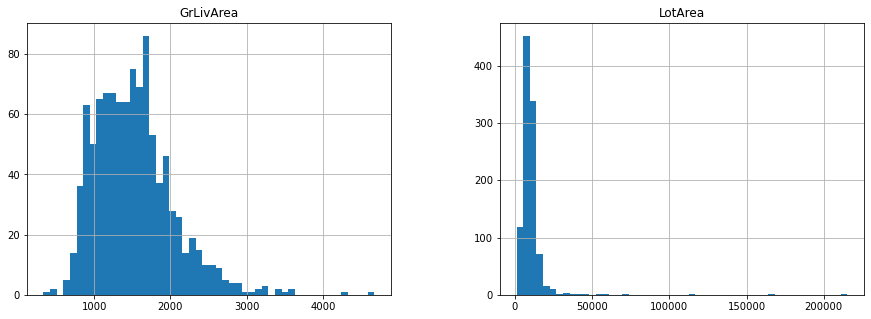

In [4]:
# we will use two continuous variables for transformation
X_train[["LotArea", 'GrLivArea']].hist(bins=50)
plt.show()

The ArbitraryDiscretiser() works only with numerical variables. The discretiser will
check if the dictionary entered by the user contains variables present in the
training set, and if these variables are cast as numerical, before doing any
transformation.

Then it transforms the variables, that is, it sorts the values into the intervals,
transform.

In [5]:
'''
Parameters
----------

binning_dict : dict
    The dictionary with the variable : interval limits pairs, provided by the user.
    A valid dictionary looks like this:

     binning_dict = {'var1':[0, 10, 100, 1000], 'var2':[5, 10, 15, 20]}.

return_object : bool, default=False
    Whether the numbers in the discrete variable should be returned as
    numeric or as object. The decision is made by the user based on
    whether they would like to proceed the engineering of the variable as
    if it was numerical or categorical.

return_boundaries: bool, default=False
    whether the output should be the interval boundaries. If True, it returns
    the interval boundaries. If False, it returns integers.
'''
atd = ArbitraryDiscretiser(binning_dict={"LotArea":[-np.inf,0, 10, 100, 1000,2000,np.inf],
                                        "GrLivArea":[-np.inf,0, 10, 100, 1000,2000,np.inf]})

atd.fit(X_train)

ArbitraryDiscretiser(binning_dict={'GrLivArea': [-inf, 0, 10, 100, 1000, 2000,
                                                 inf],
                                   'LotArea': [-inf, 0, 10, 100, 1000, 2000,
                                               inf]})

In [6]:
# binner_dict contains the boundaries of the different bins
atd.binner_dict_

{'LotArea': [-inf, 0, 10, 100, 1000, 2000, inf],
 'GrLivArea': [-inf, 0, 10, 100, 1000, 2000, inf]}

In [8]:
train_t = atd.transform(X_train)
test_t = atd.transform(X_test)

In [9]:
# the below are the bins into which the observations were sorted
train_t['GrLivArea'].unique()

array([5, 4, 3], dtype=int64)

In [10]:
# here I put side by side the original variable and the transformed variable
tmp = pd.concat([X_train[["LotArea", 'GrLivArea']], train_t[["LotArea", 'GrLivArea']]], axis=1)
tmp.columns = ["LotArea", 'GrLivArea',"LotArea_binned", 'GrLivArea_binned']
tmp.head()

,LotArea,GrLivArea,LotArea_binned,GrLivArea_binned
64,9375,2034,5,5
682,2887,1291,5,4
960,7207,858,5,3
1384,9060,1258,5,4
1100,8400,438,5,3


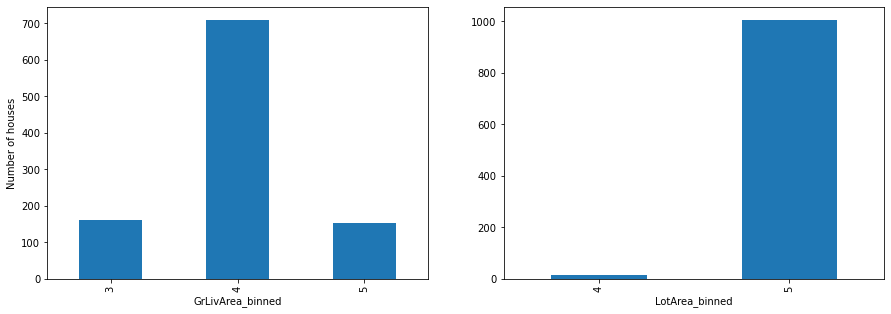

In [11]:
# in  equal frequency discretisation, we obtain the same amount of observations
# in each one of the bins.
plt.subplot(1,2,1)
tmp.groupby('GrLivArea_binned')['GrLivArea'].count().plot.bar()
plt.ylabel('Number of houses')
plt.subplot(1,2,2)
tmp.groupby('LotArea_binned')['LotArea'].count().plot.bar()

plt.show()

### Now return interval boundaries instead

In [12]:
atd = ArbitraryDiscretiser(binning_dict={"LotArea":[-np.inf,0, 10, 100, 1000,2000,np.inf],
                                        "GrLivArea":[-np.inf,0, 10, 100, 1000,2000,np.inf]},
                          return_boundaries=True)

atd.fit(X_train)

ArbitraryDiscretiser(binning_dict={'GrLivArea': [-inf, 0, 10, 100, 1000, 2000,
                                                 inf],
                                   'LotArea': [-inf, 0, 10, 100, 1000, 2000,
                                               inf]},
                     return_boundaries=True)

In [13]:
train_t = atd.transform(X_train)
test_t = atd.transform(X_test)

In [14]:
# the numbers are the different bins into which the observations
# were sorted
np.sort(np.ravel(train_t['GrLivArea'].unique()))

array([Interval(100.0, 1000.0, closed='right'),
       Interval(1000.0, 2000.0, closed='right'),
       Interval(2000.0, inf, closed='right')], dtype=object)

In [15]:
np.sort(np.ravel(test_t['GrLivArea'].unique()))

array([Interval(100.0, 1000.0, closed='right'),
       Interval(1000.0, 2000.0, closed='right'),
       Interval(2000.0, inf, closed='right')], dtype=object)